In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'C:\\Users\\MAVERICK\\OneDrive\\Desktop\\New folder'

In [3]:
data=pd.read_csv('measurements.csv')

In [4]:
data

,Height (cm),Weight (kgs),Age,Waist (cm)
0,180.05,86.82,42.28,118.30
1,179.91,90.17,43.80,121.05
2,164.46,66.47,22.77,90.13
3,164.71,66.13,23.32,90.58
4,164.32,66.53,26.92,90.23
...,...,...,...,...
995,180.08,90.69,46.91,118.03
996,165.49,63.61,26.71,90.30
997,165.27,63.20,26.73,89.28
998,164.47,65.05,25.95,89.34


In [5]:
data.isnull().sum()

Height (cm)      0
 Weight (kgs)    0
 Age             0
 Waist (cm)      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Height (cm)    1000 non-null   float64
 1    Weight (kgs)  1000 non-null   float64
 2    Age           1000 non-null   float64
 3    Waist (cm)    1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [7]:
data.describe()

,Height (cm),Weight (kgs),Age,Waist (cm)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,172.639830,77.717210,35.126570,105.231670
std,7.569367,12.608326,10.489909,15.016022
min,161.560000,59.590000,14.190000,86.950000
25%,165.020000,65.040000,24.875000,90.060000
50%,176.305000,86.990000,39.100000,117.230000
75%,179.960000,90.065000,45.052500,119.920000
max,185.380000,94.140000,54.450000,124.230000


In [8]:
data.columns

Index(['Height (cm)', ' Weight (kgs)', ' Age', ' Waist (cm)'], dtype='object')

In [9]:
# Creating a new attribute as "BMI"
data['BMI']=data[' Weight (kgs)']/((data['Height (cm)'])/100)**2

In [10]:
data.columns

Index(['Height (cm)', ' Weight (kgs)', ' Age', ' Waist (cm)', 'BMI'], dtype='object')

In [11]:
# A good BMI is Anything between 18.5 & 24.9
Good_BMI=data[data['BMI']<24.9]
Good_BMI

,Height (cm),Weight (kgs),Age,Waist (cm),BMI
2,164.46,66.47,22.77,90.13,24.575655
3,164.71,66.13,23.32,90.58,24.375784
4,164.32,66.53,26.92,90.23,24.639771
6,164.91,65.48,23.16,91.77,24.077683
11,164.78,64.06,24.84,89.21,23.592716
...,...,...,...,...,...
994,164.59,64.45,23.98,89.44,23.791183
996,165.49,63.61,26.71,90.30,23.226399
997,165.27,63.20,26.73,89.28,23.138171
998,164.47,65.05,25.95,89.34,24.047721


In [12]:
# Creating a new Attribute Waist to height "WHtr" ratio 
data['WHtr']=((data[' Waist (cm)']/2.54)/(data['Height (cm)']/2.54))

In [13]:
# Consider the Average BMI of 24.9 is considered to be a good BMI

<AxesSubplot:>

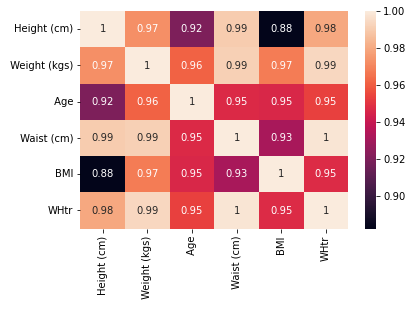

In [14]:
sns.heatmap(data.corr('pearson'),annot=True)

In [15]:
# From the Heatmap we can say that all the independent variables are High +ve linearly correlated with respect to "Waist (cm)"

In [16]:
# Checking for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
x_new=data.drop([' Waist (cm)','BMI','WHtr'],axis=1)
df_vif=pd.DataFrame()
df_vif['feature']=x_new.columns
df_vif['VIF']=[VIF(x_new.values,i) for i in range(len(x_new.columns))] 
df_vif.sort_values('VIF',ascending=False)

,feature,VIF
1,Weight (kgs),735.582681
0,Height (cm),241.548366
2,Age,167.734692


#### *Conclusion:*   Since, we can see that there is very high value of VIF since it should have been less than 5,but since we have only 3 independent variables so, it is better to consider all of them for the model

In [17]:
x_new.drop(' Weight (kgs)',axis=1,inplace=True)

In [18]:
#x_new=data.drop([' Waist (cm)','BMI','WHtr'],axis=1)
df_vif=pd.DataFrame()
df_vif['feature']=x_new.columns
df_vif['VIF']=[VIF(x_new.values,i) for i in range(len(x_new.columns))]
df_vif.sort_values('VIF',ascending=False)

,feature,VIF
0,Height (cm),16.29094
1,Age,16.29094


In [19]:
data

,Height (cm),Weight (kgs),Age,Waist (cm),BMI,WHtr
0,180.05,86.82,42.28,118.30,26.781416,0.657040
1,179.91,90.17,43.80,121.05,27.858098,0.672836
2,164.46,66.47,22.77,90.13,24.575655,0.548036
3,164.71,66.13,23.32,90.58,24.375784,0.549936
4,164.32,66.53,26.92,90.23,24.639771,0.549111
...,...,...,...,...,...,...
995,180.08,90.69,46.91,118.03,27.965877,0.655431
996,165.49,63.61,26.71,90.30,23.226399,0.545652
997,165.27,63.20,26.73,89.28,23.138171,0.540207
998,164.47,65.05,25.95,89.34,24.047721,0.543199


In [20]:
# Rounding the data column "Age" for better understanding 

data[' Age']=round(data[' Age'])
data

,Height (cm),Weight (kgs),Age,Waist (cm),BMI,WHtr
0,180.05,86.82,42.0,118.30,26.781416,0.657040
1,179.91,90.17,44.0,121.05,27.858098,0.672836
2,164.46,66.47,23.0,90.13,24.575655,0.548036
3,164.71,66.13,23.0,90.58,24.375784,0.549936
4,164.32,66.53,27.0,90.23,24.639771,0.549111
...,...,...,...,...,...,...
995,180.08,90.69,47.0,118.03,27.965877,0.655431
996,165.49,63.61,27.0,90.30,23.226399,0.545652
997,165.27,63.20,27.0,89.28,23.138171,0.540207
998,164.47,65.05,26.0,89.34,24.047721,0.543199


In [21]:
# Feature Engineering on the column Age by Binning
data['Age_cat']=pd.cut(data[' Age'],bins=[13,40,50,55],
                      labels=['below 40','between 40 & 50','above 50'])

In [22]:
data

,Height (cm),Weight (kgs),Age,Waist (cm),BMI,WHtr,Age_cat
0,180.05,86.82,42.0,118.30,26.781416,0.657040,between 40 & 50
1,179.91,90.17,44.0,121.05,27.858098,0.672836,between 40 & 50
2,164.46,66.47,23.0,90.13,24.575655,0.548036,below 40
3,164.71,66.13,23.0,90.58,24.375784,0.549936,below 40
4,164.32,66.53,27.0,90.23,24.639771,0.549111,below 40
...,...,...,...,...,...,...,...
995,180.08,90.69,47.0,118.03,27.965877,0.655431,between 40 & 50
996,165.49,63.61,27.0,90.30,23.226399,0.545652,below 40
997,165.27,63.20,27.0,89.28,23.138171,0.540207,below 40
998,164.47,65.05,26.0,89.34,24.047721,0.543199,below 40


In [23]:
data.columns

Index(['Height (cm)', ' Weight (kgs)', ' Age', ' Waist (cm)', 'BMI', 'WHtr',
       'Age_cat'],
      dtype='object')

<AxesSubplot:xlabel='Age_cat', ylabel=' Waist (cm)'>

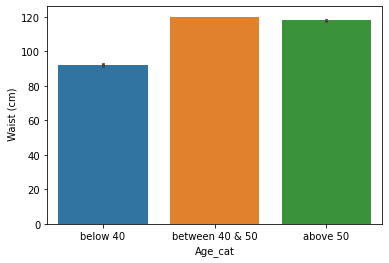

In [24]:
sns.barplot(x=data['Age_cat'],y=data[' Waist (cm)'])

* A person is at higher risk of developing central obesity-related illness if they have a WHtR of over 0.5

In [26]:
Good_Whtr=data[data['WHtr']<=0.53 ]
Good_Whtr

,Height (cm),Weight (kgs),Age,Waist (cm),BMI,WHtr,Age_cat
25,165.33,62.87,29.0,86.97,23.000651,0.526039,below 40
48,165.26,64.53,28.0,87.52,23.627957,0.529590,below 40
143,165.00,67.38,27.0,87.28,24.749311,0.528970,below 40
215,164.89,64.54,27.0,86.95,23.737792,0.527321,below 40
227,164.94,62.96,27.0,87.04,23.142631,0.527707,below 40
273,165.42,65.04,29.0,87.09,23.768649,0.526478,below 40
584,165.30,66.72,28.0,87.52,24.418014,0.529462,below 40
687,164.96,63.96,27.0,87.03,23.504508,0.527582,below 40
734,164.71,62.72,27.0,86.99,23.118844,0.528140,below 40
792,165.44,60.57,29.0,86.95,22.129751,0.525568,below 40


### *Lets do a hypothesis testing to check the chance of increased risk of heart attack, stroke or death if "Waist to height ratio" (WHtr %) is less than 50% as per population with standard Deviation of 0.0608 at 95% Confidence level.*

In [27]:
# Given that 

#  Population mean 
u=0.50 
#  Sample mean      
x=data['WHtr'].mean()
#  standard deviation    
s=data['WHtr'].std()
#  number of observation     
n=data.shape[0]

In [28]:
data['WHtr'].mean(),data['WHtr'].std(),data.shape

(0.6069345631389534, 0.0608322939798972, (1000, 7))

* Ho: u<=0.50 the chance of increased risk of heart attack, stroke or death is low
* Ha: u>0.50  the chance of increased risk of heart attack, stroke or death is High
* @ level of significance 0.05

In [30]:
# Calculated z value

z_cal=(x-u)/(s/np.sqrt(n))
z_cal

55.58836565096915

In [31]:
from statsmodels.stats import weightstats as stest

In [32]:
# using Coding z_cal value

stest.ztest(data['WHtr'],value=0.5)

(55.588365650968846, 0.0)

In [33]:
# Critical z value( from z table)

z_critical=1.64     # At 95% Confidence level

In [34]:
# Comparing "z_cal" with "z_critical"

z_cal>z_critical

True

#### Since the z_cal > z_critical , So we reject the Null Hypothsis ,Hence we can say that the chance of increased risk of heart attack, stroke or death is High for the people in this data 

In [35]:
# These are the  people with the best and proper "BMI" and "Waist-Height_Ratio" as we can say that it is between 27-29 Age group.

pd.merge(Good_BMI,Good_Whtr,how='inner',on=' Age')

,Height (cm)_x,Weight (kgs)_x,Age,Waist (cm)_x,BMI_x,Height (cm)_y,Weight (kgs)_y,Waist (cm)_y,BMI_y,WHtr,Age_cat
0,165.26,64.53,28.0,87.52,23.627957,165.26,64.53,87.52,23.627957,0.529590,below 40
1,165.26,64.53,28.0,87.52,23.627957,165.30,66.72,87.52,24.418014,0.529462,below 40
2,165.29,64.52,27.0,88.94,23.615720,165.00,67.38,87.28,24.749311,0.528970,below 40
3,165.29,64.52,27.0,88.94,23.615720,164.89,64.54,86.95,23.737792,0.527321,below 40
4,165.29,64.52,27.0,88.94,23.615720,164.94,62.96,87.04,23.142631,0.527707,below 40
5,165.29,64.52,27.0,88.94,23.615720,164.96,63.96,87.03,23.504508,0.527582,below 40
6,165.29,64.52,27.0,88.94,23.615720,164.71,62.72,86.99,23.118844,0.528140,below 40
7,162.75,65.47,29.0,88.34,24.717261,165.33,62.87,86.97,23.000651,0.526039,below 40
8,162.75,65.47,29.0,88.34,24.717261,165.42,65.04,87.09,23.768649,0.526478,below 40
9,162.75,65.47,29.0,88.34,24.717261,165.44,60.57,86.95,22.129751,0.525568,below 40


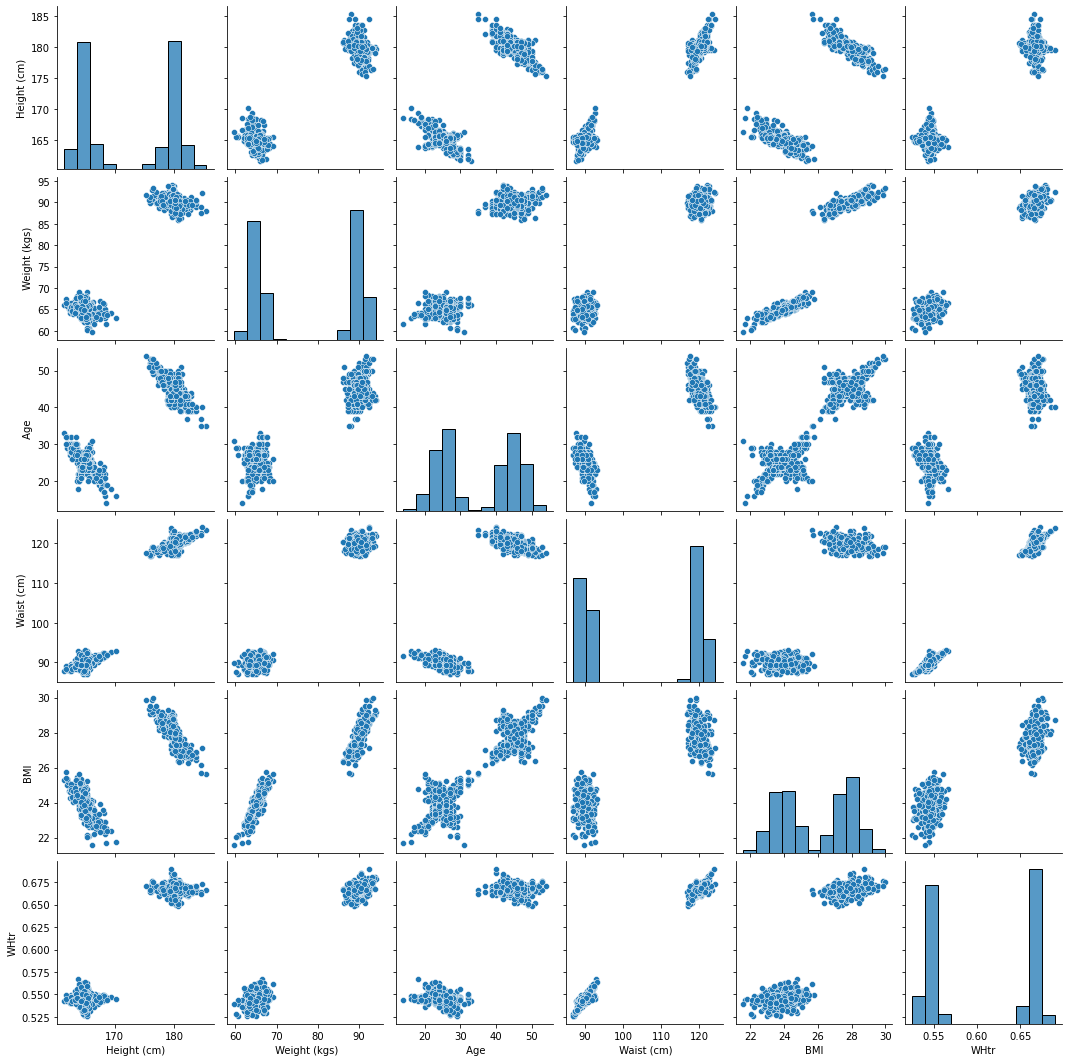

In [36]:
sns.pairplot(data)

In [37]:
# from the above we can say that the data is linearily distributed with respect to "Waist (cm)" but the data is
# not Normally distributed 

In [38]:
# Dropping the attribute 'Age_cat'
data.drop('Age_cat',axis=1,inplace=True)

In [39]:
# Applying Normalization technique 

max_data=data.max() # max value in data
print('The max value in data for each attributes')
print(max_data)
min_data=data.min()  # min value in data
print('The min value in data for each attributes')
print(min_data)

The max value in data for each attributes
Height (cm)      185.380000
 Weight (kgs)     94.140000
 Age              54.000000
 Waist (cm)      124.230000
BMI               29.988767
WHtr               0.689955
dtype: float64
The min value in data for each attributes
Height (cm)      161.560000
 Weight (kgs)     59.590000
 Age              14.000000
 Waist (cm)       86.950000
BMI               21.547103
WHtr               0.525568
dtype: float64


In [40]:
data

,Height (cm),Weight (kgs),Age,Waist (cm),BMI,WHtr
0,180.05,86.82,42.0,118.30,26.781416,0.657040
1,179.91,90.17,44.0,121.05,27.858098,0.672836
2,164.46,66.47,23.0,90.13,24.575655,0.548036
3,164.71,66.13,23.0,90.58,24.375784,0.549936
4,164.32,66.53,27.0,90.23,24.639771,0.549111
...,...,...,...,...,...,...
995,180.08,90.69,47.0,118.03,27.965877,0.655431
996,165.49,63.61,27.0,90.30,23.226399,0.545652
997,165.27,63.20,27.0,89.28,23.138171,0.540207
998,164.47,65.05,26.0,89.34,24.047721,0.543199


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Height (cm)    1000 non-null   float64
 1    Weight (kgs)  1000 non-null   float64
 2    Age           1000 non-null   float64
 3    Waist (cm)    1000 non-null   float64
 4   BMI            1000 non-null   float64
 5   WHtr           1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [42]:
data.columns

Index(['Height (cm)', ' Weight (kgs)', ' Age', ' Waist (cm)', 'BMI', 'WHtr'], dtype='object')

In [43]:
data1=(data-min_data)/(max_data-min_data)
data1

,Height (cm),Weight (kgs),Age,Waist (cm),BMI,WHtr
0,0.776238,0.788133,0.700,0.840933,0.620057,0.799770
1,0.770361,0.885094,0.750,0.914700,0.747601,0.895865
2,0.121746,0.199132,0.225,0.085300,0.358762,0.136677
3,0.132242,0.189291,0.225,0.097371,0.335086,0.148236
4,0.115869,0.200868,0.325,0.087983,0.366358,0.143219
...,...,...,...,...,...,...
995,0.777498,0.900145,0.825,0.833691,0.760368,0.789983
996,0.164987,0.116353,0.325,0.089861,0.198930,0.122176
997,0.155751,0.104486,0.325,0.062500,0.188478,0.089051
998,0.122166,0.158032,0.300,0.064109,0.296223,0.107254


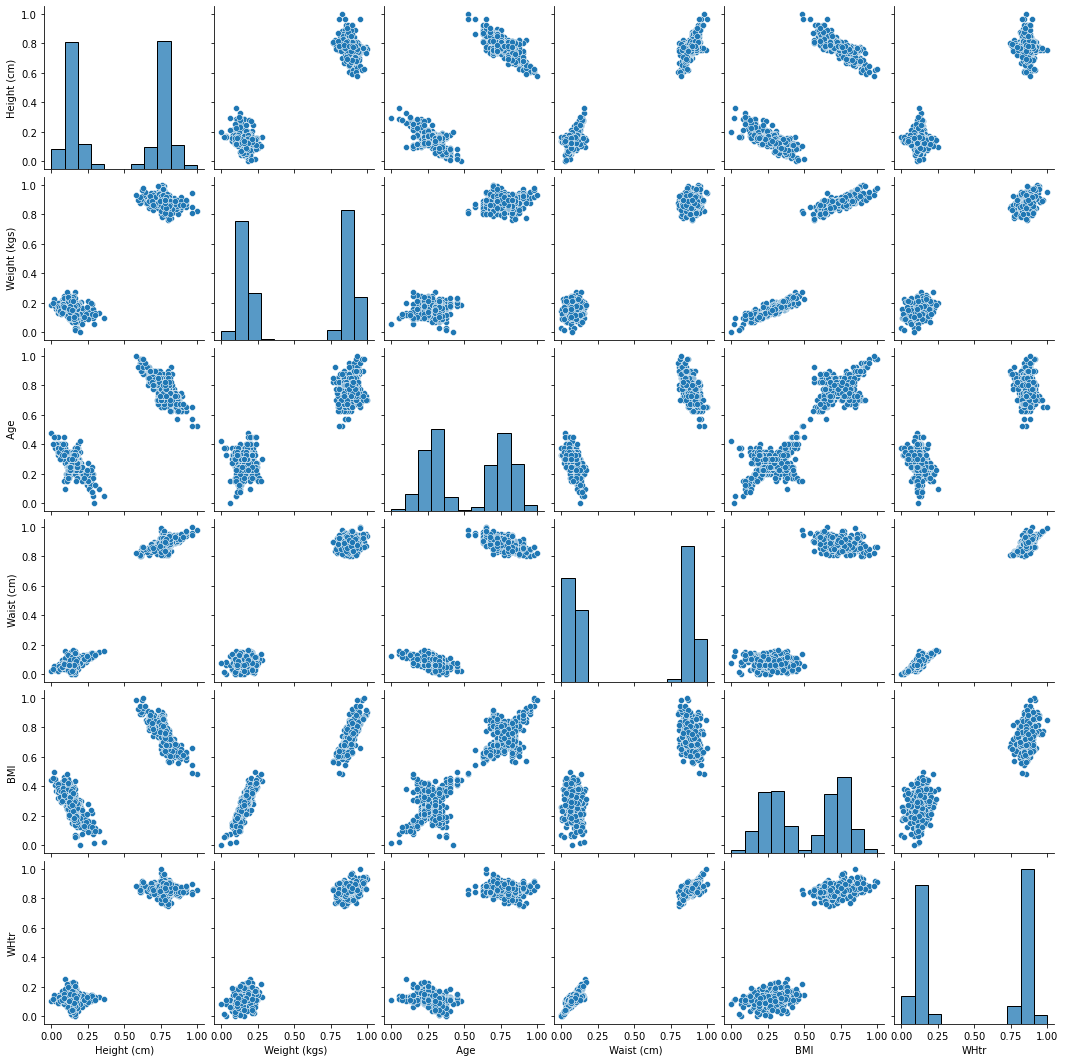

In [44]:
sns.pairplot(data1)

### Checking the Range in the data  to standarize  if Required


In [45]:
data['Height (cm)'].max(),data['Height (cm)'].min()
range_Height=data['Height (cm)'].max()-data['Height (cm)'].min()
range_Height

23.819999999999993

In [46]:
data[' Weight (kgs)'].max(),data[' Weight (kgs)'].min()
range_Weight=data[' Weight (kgs)'].max()-data[' Weight (kgs)'].min()
range_Weight

34.55

In [47]:
data[' Age'].max(),data[' Age'].min()
range_Age=data[' Age'].max()-data[' Age'].min()
range_Age

40.0

In [48]:
# So we can conclude that the data is almost in the same range and not required to be scaled.

In [49]:
data.columns

Index(['Height (cm)', ' Weight (kgs)', ' Age', ' Waist (cm)', 'BMI', 'WHtr'], dtype='object')

# Linear Regression Model 

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
X=data.drop(['WHtr',' Waist (cm)', 'BMI',],axis=1) #'Age_cat' already dropped
y=data[' Waist (cm)']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [53]:
# Splitting the data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [54]:
lr=LinearRegression()

In [55]:
model=lr.fit(x_train,y_train)
model

LinearRegression()

In [56]:
train_pred=model.predict(x_train)

In [57]:
test_pred=model.predict(x_test)

In [58]:
print('the r2_score for train is ',r2_score(y_train,train_pred))
print('the r2_score for test is ',r2_score(y_test,test_pred))

the r2_score for train is  0.9957364906434508
the r2_score for test is  0.994540656884899


### Data Evaluation

In [59]:
print('the RMSE for train is ',np.sqrt(mean_squared_error(y_train,train_pred)))
print('the RMSE for test is ',np.sqrt(mean_squared_error(y_test,test_pred)))

the RMSE for train is  0.979317731194434
the RMSE for test is  1.1075653051857817


# Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
RFC=RandomForestRegressor(n_estimators=50,n_jobs=-1,oob_score=True,random_state=1)

In [62]:
rfc_model=RFC.fit(x_train,y_train)
rfc_model

RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=1)

In [63]:
train_pred_rfc=RFC.predict(x_train)

In [64]:
test_pred_rfc=RFC.predict(x_test)

In [65]:
print('the r2_score for train is ',r2_score(y_train,train_pred_rfc))
print('the r2_score for test is ',r2_score(y_test,test_pred_rfc))

the r2_score for train is  0.9997125661124381
the r2_score for test is  0.9978936429967055


### Data Evaluation

In [66]:
print('the RMSE for train is ',np.sqrt(mean_squared_error(y_train,train_pred_rfc)))
print('the RMSE for test is ',np.sqrt(mean_squared_error(y_test,test_pred_rfc)))

the RMSE for train is  0.2542781200772082
the RMSE for test is  0.68796308970758


### Advantages of using Ensemble Methods for Model Building

##### 1-Multi-collinearity of features does not affect the accuracy and prediction performance of the model: features do not need to be removed or otherwise engineered to decrease the correlations and interactions between them.
##### 2-Inputs do not need to be scaled: preprocessing and transforming the features with MinMaxScaler or StandardScaler are not necessary